<a href="https://colab.research.google.com/github/Yashwini-13/GEN-AI/blob/main/GAN(FACE_IMAGE_GENERATION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import ( Dense, Conv2D, Conv2DTranspose, Flatten, Reshape, BatchNormalization, LeakyReLU, Input)

In [ ]:
# Hyperparameters
BATCH_SIZE = 64
IMG_SIZE = 128
LATENT_DIM = 100
EPOCHS = 100
LR = 2e-4

In [ ]:
#Generator

def build_generator(latent_dim=100):
  return tf.keras. Sequential([
      Input((latent_dim,)),
      Dense (8*8*512, use_bias=False),
      Reshape((8, 8,512)),
      Conv2DTranspose (256, 4, 2, "same", use_bias=False),
      BatchNormalization(), LeakyReLU(),
      Conv2DTranspose(128, 4, 2, "same", use_bias=False),
      BatchNormalization(), LeakyReLU(),
      Conv2DTranspose (64, 4, 2, "same", use_bias=False),
      BatchNormalization() , LeakyReLU(),
      Conv2DTranspose(3, 4, 2, "same", activation="tanh")
      ], name="Generator")

In [ ]:
#Discriminator
def build_discriminator(img_size=128):
  return tf.keras. Sequential([
      Input((img_size, img_size, 3)),
      Conv2D (64, 4, 2, "same"),LeakyReLU (0.2),
      Conv2D(128, 4, 2, "same"),LeakyReLU(0.2),
      Conv2D(256, 4, 2, "same"),LeakyReLU (0.2),
      Conv2D(512, 4, 2, "same"),LeakyReLU (0.2),
      Flatten(),
      Dense (1)
      ], name="Discriminator")


In [ ]:
G, D = build_generator(), build_discriminator()

In [ ]:
# Optimizers & loss
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_opt= tf.keras.optimizers.Adam (LR, 0.5)
d_opt= tf.keras.optimizers.Adam (LR, 0.5)

In [ ]:


@tf.function
def train_step(real):
  noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])
  with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
    fake =  G(noise, training=True)
    r_out, f_out = D(real, training=True), D(fake, training=True)
    g_loss= loss_fn(tf.ones_like(f_out), f_out)
    d_loss =loss_fn(tf.ones_like(r_out), r_out) +loss_fn( tf.zeros_like(f_out), f_out)
    g_opt.apply_gradients(zip(g_tape.gradient(g_loss, G.trainable_variables), G.trainable_variables))
    d_opt.apply_gradients(zip(d_tape.gradient(d_loss, D.trainable_variables), D.trainable_variables))
    return g_loss, d_loss


In [ ]:
#show generated images
def show_images (epoch, seed):
  preds = G(seed, training=False)
  preds = (preds + 1)/2.0 # [-1,1] [0,1]
  fig, axes = plt.subplots (4,4, figsize=(6,6))
  for i, ax in enumerate (axes.flat):
    ax.imshow(preds[i].numpy())
    ax.axis("off")
  plt.suptitle(f"Epoch {epoch}")
  plt.show()

In [ ]:
#Load dataset (resize to 128x128, normalize to [-1,1])

train_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/FakeFace-main",
                                                       label_mode=None,
                                                       image_size=(IMG_SIZE, IMG_SIZE),
                                                       batch_size=BATCH_SIZE
).map(lambda x: (tf.cast(x, tf.float32) / 127.5) - 1.0).prefetch(
    tf.data.AUTOTUNE)

Found 362 files.


Epoch 1/100 | G: 3.371 D: 0.175
Epoch 2/100 | G: 3.743 D: 0.192
Epoch 3/100 | G: 3.291 D: 0.229
Epoch 4/100 | G: 4.180 D: 0.153
Epoch 5/100 | G: 3.292 D: 0.164


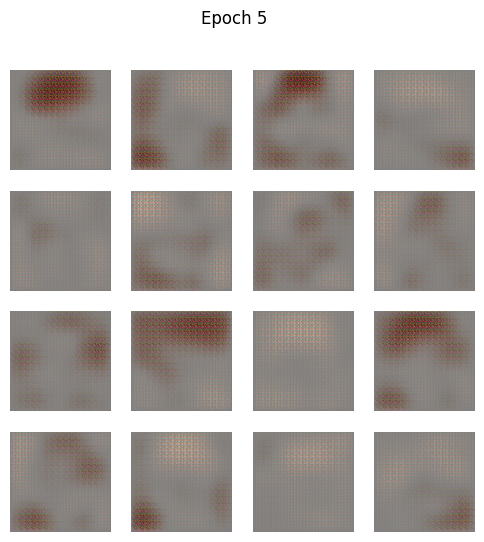

Epoch 6/100 | G: 4.144 D: 0.186
Epoch 7/100 | G: 4.787 D: 1.181
Epoch 8/100 | G: 2.096 D: 0.454
Epoch 9/100 | G: 0.726 D: 1.180
Epoch 10/100 | G: 1.180 D: 0.729


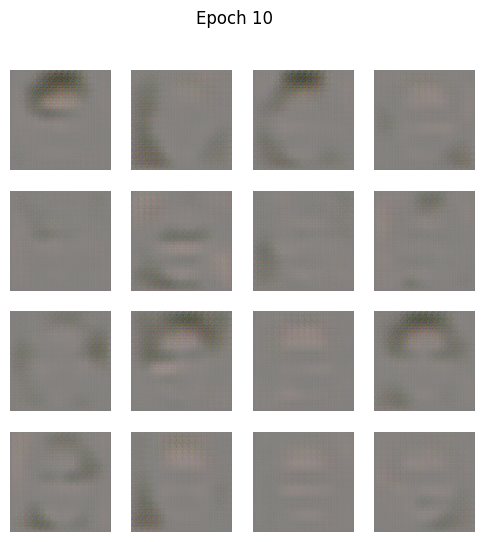

Epoch 11/100 | G: 2.030 D: 0.666
Epoch 12/100 | G: 0.857 D: 0.880
Epoch 13/100 | G: 1.452 D: 0.571
Epoch 14/100 | G: 1.154 D: 0.812
Epoch 15/100 | G: 2.371 D: 1.332


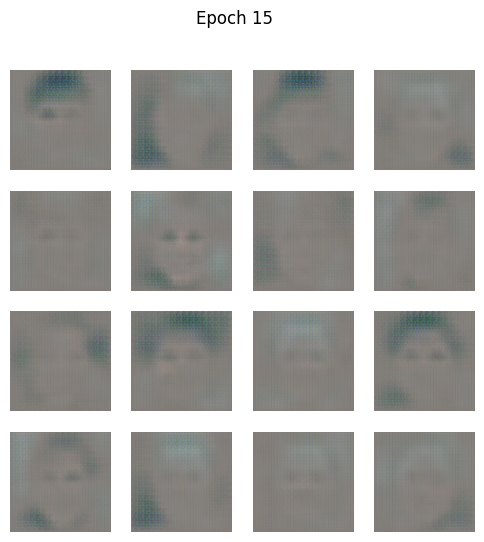

Epoch 16/100 | G: 1.083 D: 0.809
Epoch 17/100 | G: 1.143 D: 0.851
Epoch 18/100 | G: 1.566 D: 0.974
Epoch 19/100 | G: 1.518 D: 1.047
Epoch 20/100 | G: 1.031 D: 1.004


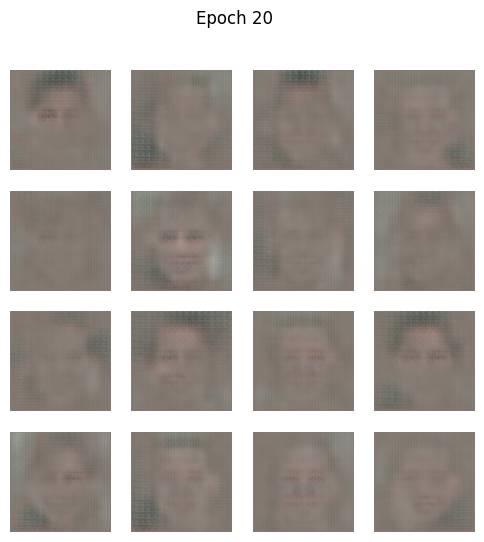

Epoch 21/100 | G: 1.031 D: 0.936
Epoch 22/100 | G: 0.892 D: 1.030
Epoch 23/100 | G: 1.044 D: 1.058
Epoch 24/100 | G: 1.010 D: 0.981
Epoch 25/100 | G: 1.016 D: 0.955


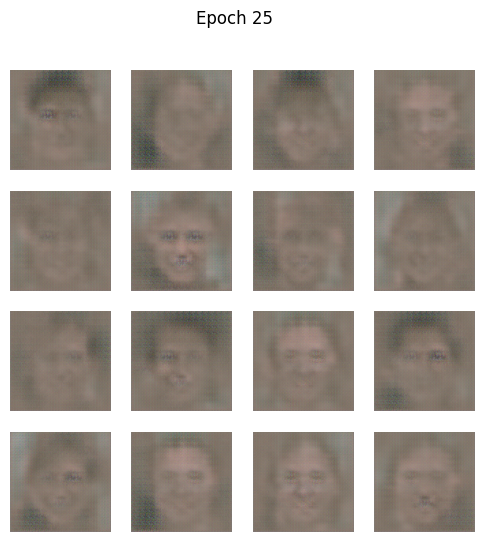

Epoch 26/100 | G: 1.106 D: 1.087
Epoch 27/100 | G: 0.890 D: 1.083
Epoch 28/100 | G: 1.081 D: 1.217
Epoch 29/100 | G: 0.979 D: 1.177
Epoch 30/100 | G: 0.748 D: 1.155


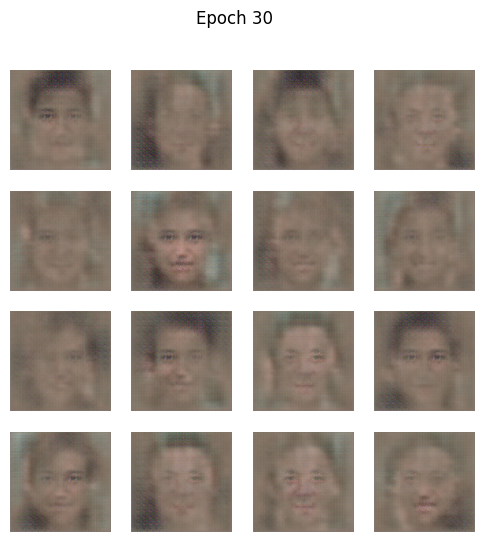

Epoch 31/100 | G: 1.000 D: 1.030
Epoch 32/100 | G: 2.519 D: 2.085
Epoch 33/100 | G: 0.669 D: 1.379
Epoch 34/100 | G: 0.927 D: 1.121
Epoch 35/100 | G: 0.989 D: 1.052


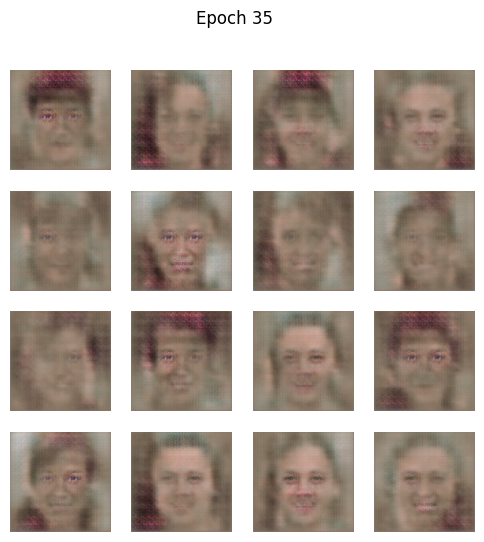

Epoch 36/100 | G: 0.991 D: 1.420
Epoch 37/100 | G: 0.974 D: 1.196
Epoch 38/100 | G: 0.943 D: 1.042
Epoch 39/100 | G: 0.920 D: 1.398
Epoch 40/100 | G: 0.835 D: 1.171


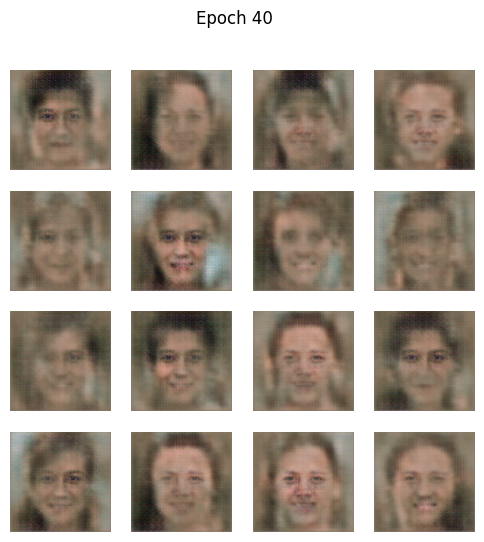

Epoch 41/100 | G: 0.893 D: 1.226
Epoch 42/100 | G: 1.005 D: 1.157
Epoch 43/100 | G: 0.779 D: 1.255
Epoch 44/100 | G: 0.763 D: 1.240
Epoch 45/100 | G: 0.620 D: 1.340


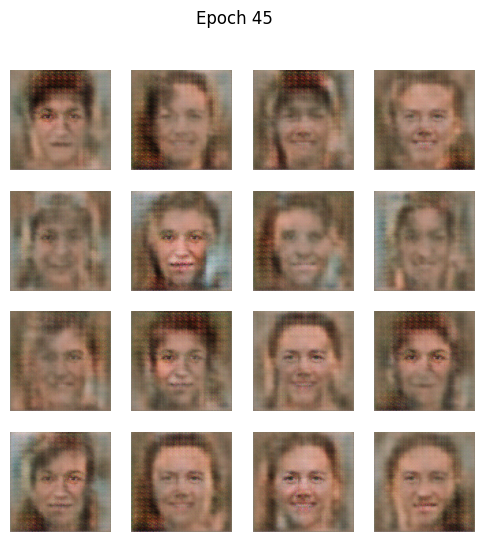

Epoch 46/100 | G: 0.854 D: 1.100
Epoch 47/100 | G: 0.685 D: 1.347
Epoch 48/100 | G: 0.705 D: 1.267
Epoch 49/100 | G: 0.929 D: 1.218
Epoch 50/100 | G: 0.843 D: 1.269


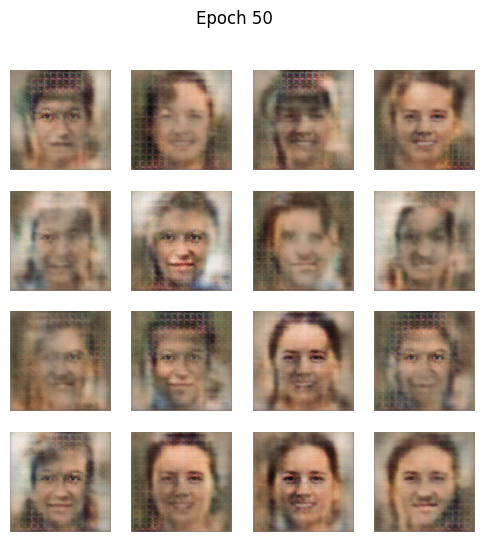

Epoch 51/100 | G: 1.035 D: 1.261
Epoch 52/100 | G: 0.843 D: 1.293
Epoch 53/100 | G: 1.003 D: 1.172
Epoch 54/100 | G: 0.929 D: 1.302
Epoch 55/100 | G: 0.814 D: 1.374


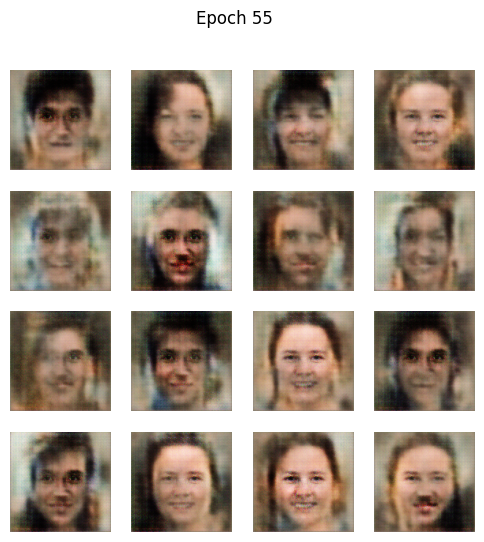

Epoch 56/100 | G: 0.983 D: 1.351
Epoch 57/100 | G: 0.886 D: 1.199
Epoch 58/100 | G: 0.736 D: 1.213
Epoch 59/100 | G: 1.001 D: 1.172
Epoch 60/100 | G: 0.664 D: 1.366


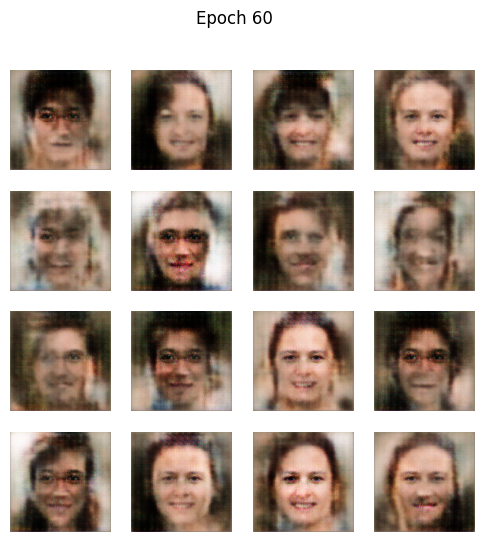

Epoch 61/100 | G: 0.816 D: 1.165
Epoch 62/100 | G: 1.031 D: 1.197
Epoch 63/100 | G: 0.884 D: 1.258
Epoch 64/100 | G: 0.873 D: 1.185
Epoch 65/100 | G: 1.115 D: 1.236


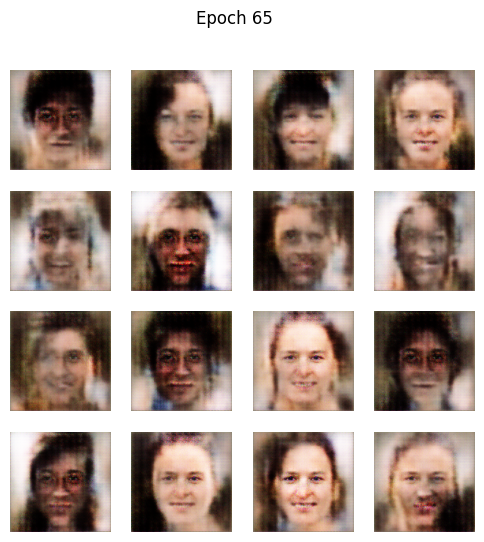

Epoch 66/100 | G: 0.681 D: 1.388
Epoch 67/100 | G: 0.567 D: 1.419
Epoch 68/100 | G: 0.878 D: 1.186
Epoch 69/100 | G: 1.120 D: 1.050
Epoch 70/100 | G: 0.490 D: 1.373


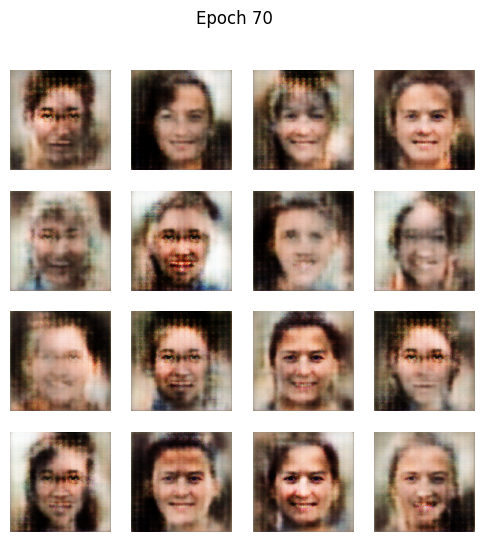

Epoch 71/100 | G: 0.649 D: 1.254
Epoch 72/100 | G: 0.810 D: 1.244
Epoch 73/100 | G: 1.126 D: 1.208
Epoch 74/100 | G: 0.785 D: 1.167
Epoch 75/100 | G: 0.583 D: 1.271


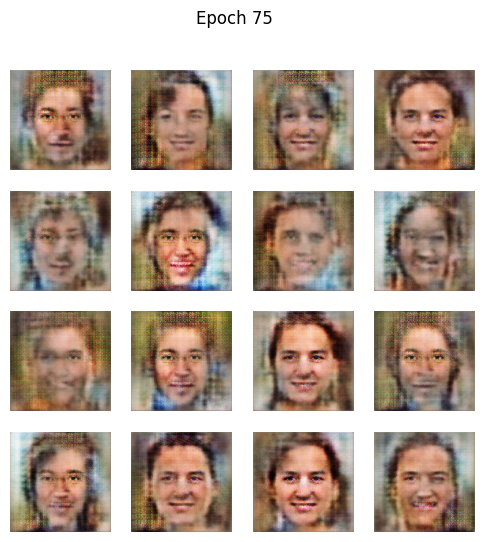

Epoch 76/100 | G: 0.598 D: 1.239
Epoch 77/100 | G: 0.669 D: 1.367
Epoch 78/100 | G: 1.050 D: 1.134
Epoch 79/100 | G: 0.755 D: 1.101
Epoch 80/100 | G: 0.728 D: 1.275


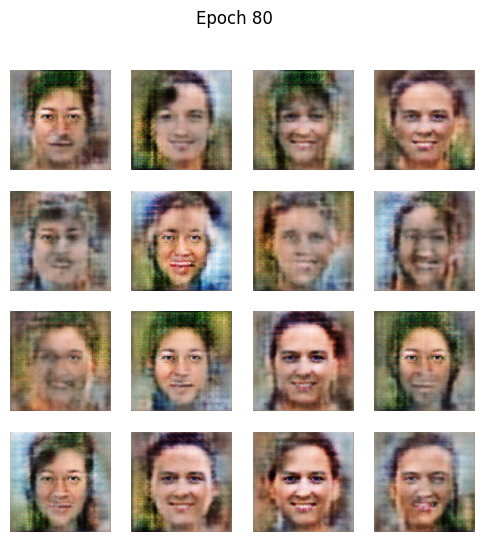

Epoch 81/100 | G: 0.874 D: 1.170
Epoch 82/100 | G: 0.901 D: 1.098
Epoch 83/100 | G: 0.476 D: 1.352
Epoch 84/100 | G: 0.863 D: 1.241
Epoch 85/100 | G: 0.663 D: 1.199


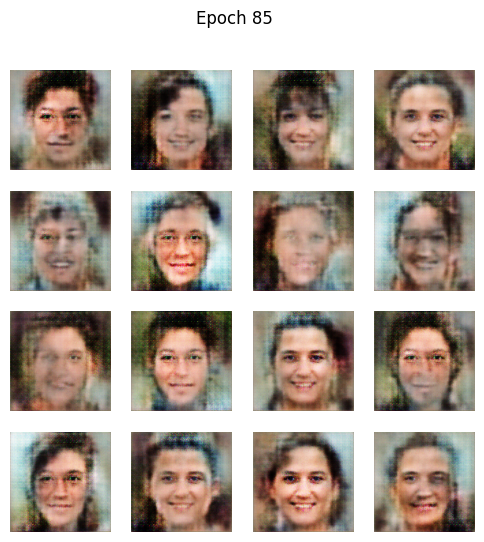

Epoch 86/100 | G: 0.955 D: 0.988
Epoch 87/100 | G: 0.812 D: 1.209
Epoch 88/100 | G: 0.779 D: 1.172
Epoch 89/100 | G: 0.981 D: 1.240
Epoch 90/100 | G: 0.804 D: 1.101


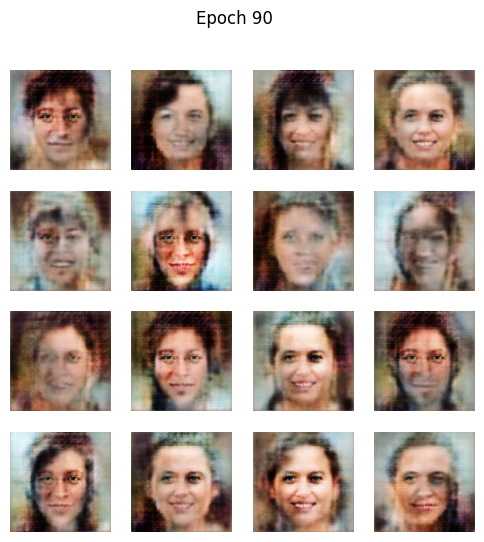

Epoch 91/100 | G: 0.834 D: 1.110
Epoch 92/100 | G: 0.688 D: 1.132
Epoch 93/100 | G: 0.744 D: 1.159
Epoch 94/100 | G: 0.405 D: 1.460
Epoch 95/100 | G: 0.946 D: 1.110


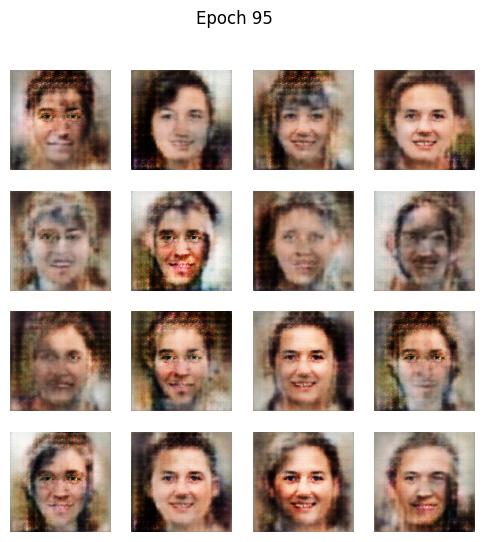

Epoch 96/100 | G: 0.789 D: 1.250
Epoch 97/100 | G: 0.804 D: 1.103
Epoch 98/100 | G: 0.820 D: 1.126
Epoch 99/100 | G: 0.781 D: 1.176
Epoch 100/100 | G: 0.646 D: 1.110


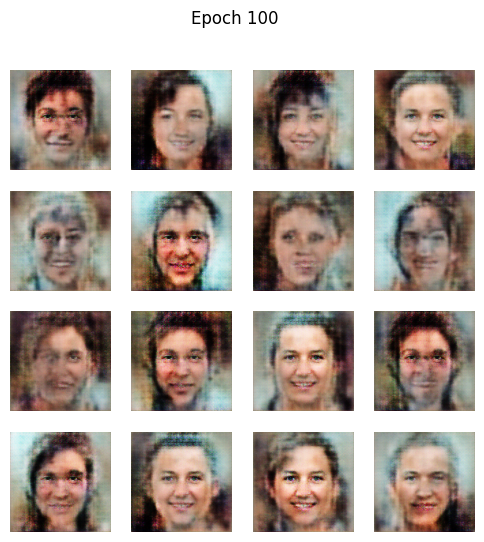

In [ ]:
# Training loop

seed = tf.random.normal([16, LATENT_DIM])

for e in range(1, EPOCHS+1):
  for real in train_ds:
    g_loss, d_loss = train_step(real)
  print(f"Epoch {e}/{EPOCHS} | G: {g_loss:.3f} D: {d_loss:.3f}")
  if e % 5 == 0: show_images(e, seed)